In [1]:
import pandas as pd
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
from keras.models import  load_model
#from keras.layers import LSTM , Dense , Embedding , Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Conv2D, Flatten, Dense , LSTM ,Embedding , Dropout,SpatialDropout1D
from tensorflow.keras import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv('Train.csv')

In [3]:
df.head()

,ID,Text,Label
0,ID_AASHwXxg,Mwangonde: Khansala wachinyamata Akamati achi...,POLITICS
1,ID_AGoFySzn,MCP siidakhutire ndi kalembera Chipani cha Ma...,POLITICS
2,ID_AGrrkBGP,Bungwe la MANEPO Lapempha Boma Liganizire Anth...,HEALTH
3,ID_AIJeigeG,Ndale zogawanitsa miyambo zanyanya Si zachile...,POLITICS
4,ID_APMprMbV,Nanga wapolisi ataphofomoka? Masiku ano sichi...,LAW/ORDER


In [4]:
df.isna().sum()

ID       0
Text     0
Label    0
dtype: int64

In [5]:
df['Text'].str.len()

0       2627
1       2720
2        940
3       3575
4        372
        ... 
1431    1326
1432    3949
1433    1616
1434    2632
1435    4585
Name: Text, Length: 1436, dtype: int64

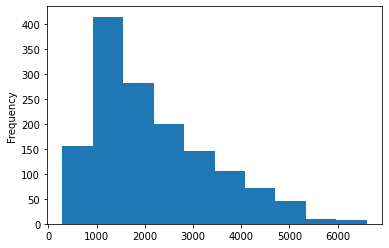

In [6]:
df['Text'].str.len().plot(kind='hist')

In [7]:
df['Label'].value_counts()

POLITICS                279
SOCIAL                  152
RELIGION                147
LAW/ORDER               136
SOCIAL ISSUES           134
HEALTH                  127
ECONOMY                  86
FARMING                  78
SPORTS                   49
EDUCATION                43
RELATIONSHIPS            39
WILDLIFE/ENVIRONMENT     36
OPINION/ESSAY            26
LOCALCHIEFS              25
CULTURE                  23
WITCHCRAFT               16
MUSIC                    15
TRANSPORT                11
FLOODING                  7
ARTS AND CRAFTS           7
Name: Label, dtype: int64

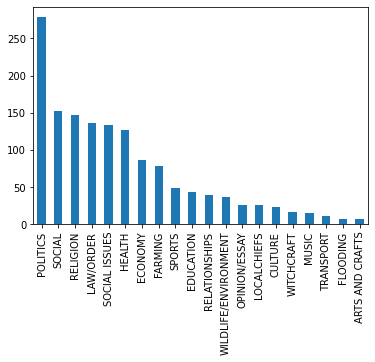

In [8]:
df['Label'].value_counts().plot(kind='bar')

In [ ]:
MAX_SEQUENCE_LENGTH = 4000
MAX_NB_WORDS = 5000

In [9]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS , split=" ")
tokenizer.fit_on_texts(df['Text'].values)

In [10]:
X = tokenizer.texts_to_sequences(df['Text'].values)
X= pad_sequences(X ,maxlen=MAX_SEQUENCE_LENGTH)
X[:7]

array([[  0,   0,   0, ...,  16,  68, 110],
       [  0,   0,   0, ..., 511,  59,  93],
       [  0,   0,   0, ...,   8,  16, 163],
       ...,
       [  0,   0,   0, ..., 198, 909, 412],
       [  0,   0,   0, ..., 394,   5, 877],
       [  0,   0,   0, ...,  27,  43,  14]], dtype=int32)

In [11]:
model = Sequential()
model.add(Embedding(5000,265, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(20, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


#model.compile(loss='categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 774, 265)          1325000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 774, 265)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               146400    
_________________________________________________________________
dense (Dense)                (None, 20)                2020      
Total params: 1,473,420
Trainable params: 1,473,420
Non-trainable params: 0
_________________________________________________________________


In [12]:
y = pd.get_dummies(df['Label']).values
[print(df['Label'][i] , y[i]) for i in range (0,40)]
print('Shape of label tensor:', y.shape)

POLITICS [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
POLITICS [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
HEALTH [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
POLITICS [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
LAW/ORDER [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
LAW/ORDER [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
RELIGION [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
LAW/ORDER [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
FARMING [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
WILDLIFE/ENVIRONMENT [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
POLITICS [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
FARMING [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
RELIGION [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
WILDLIFE/ENVIRONMENT [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
SOCIAL ISSUES [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
LAW/ORDER [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
LAW/ORDER [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
FARMING [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
SOCIAL ISSUES [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 

In [13]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.3 , random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1005, 774) (1005, 20)
(431, 774) (431, 20)


In [14]:
batch_size = 32
epochs = 10
model.fit(X_train , y_train , epochs = epochs , batch_size = batch_size , verbose = 2)

Epoch 1/10
32/32 - 119s - loss: 2.7691 - accuracy: 0.1881
Epoch 2/10
32/32 - 114s - loss: 2.5319 - accuracy: 0.2020
Epoch 3/10
32/32 - 114s - loss: 2.2586 - accuracy: 0.3055
Epoch 4/10
32/32 - 114s - loss: 1.8057 - accuracy: 0.4239
Epoch 5/10
32/32 - 114s - loss: 1.4389 - accuracy: 0.5811
Epoch 6/10
32/32 - 113s - loss: 1.0619 - accuracy: 0.6896
Epoch 7/10
32/32 - 115s - loss: 0.8488 - accuracy: 0.7701
Epoch 8/10
32/32 - 116s - loss: 0.5643 - accuracy: 0.8557
Epoch 9/10
32/32 - 115s - loss: 0.3832 - accuracy: 0.9104
Epoch 10/10
32/32 - 114s - loss: 0.2842 - accuracy: 0.9423


In [15]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

14/14 [==============================] - 5s 318ms/step - loss: 2.8983 - accuracy: 0.3550
Test set
  Loss: 2.898
  Accuracy: 0.355


NameError: ignored

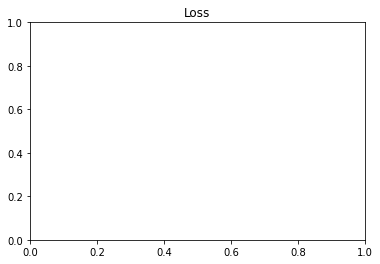

In [16]:
plt.title('Loss')
plt.plot(model.history['loss'], label='train')
plt.plot(model.history['val_loss'], label='test')
plt.legend()
plt.show();

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [17]:
test_df = pd.read_csv('Test.csv')
test_df.head()

,ID,Text
0,ID_ADHEtjTi,Abambo odzikhweza akuchuluka Kafukufuku wa ap...
1,ID_AHfJktdQ,Ambuye Ziyaye Ayamikira Aphunzitsi a Tilitonse...
2,ID_AUJIHpZr,Anatcheleza: Akundiopseza a gogo wanga Akundi...
3,ID_AUKYBbIM,Ulova wafika posauzana Adatenga digiri ya uph...
4,ID_AZnsVPEi,"Dzombe kukoma, koma Kuyambira makedzana, pant..."


In [21]:
test_df['Text'][12]

'Bungwe la Senior Citizen Lipempha Anthu Athandize Okalamba Bungwe lolimbikitsa kufunika kokumbukira anthu achikulire ku parish ya Limbe Cathedral mu arkdayosizi ya Blantyre la Senior Citizen lati ndi udindo wa mzika iliyonse kuthandiza anthu achikulire mdziko muno Bungweli lanena izi ku Limbe cathedral mu mzinda wa Blantyre pambuyo ya phwando lomwe bungweli linakonzela anthu okalamba aparishiyi Lachitatu pa 1 January 2020. \nBambo Benito Masuwa omwe anatsogolera wa nsembe ya ukalistiya yothokoza Mulungu chifukwa cha moyo wa anthu achikulire opezeka mparishiyi, anayamikira achikulirewa pozisunga komanso kudzilesa ku zokhumba za moyo zomwe mwazina zawasunga ndi moyo mpaka lero. \nEna mwa mamembala a bungwe la Senior Citizen pa tsikulo la phwandolo Munthu amene wakhala moyo wautali amasonyeza kuti wadutsa ndikupambana mzambiri zokoma za moyo uno, anatero bambo Masuwa. \nBambo Masuwa anapitiliza kupempha achinyamata kuti atengerepo phunziro kuchokela kwa anthu achikulirewa posatengeka ndi

In [25]:
test_df.shape

(620, 2)

In [23]:
MAX_SEQUENCE_LENGTH = 4000
MAX_NB_WORDS = 5000
new_complaint = ['Bungwe la Senior Citizen Lipempha Anthu Athandize Okalamba Bungwe lolimbikitsa kufunika kokumbukira anthu achikulire ku parish ya Limbe Cathedral mu arkdayosizi ya Blantyre la Senior Citizen lati ndi udindo wa mzika iliyonse kuthandiza anthu achikulire mdziko muno Bungweli lanena izi ku Limbe cathedral mu mzinda wa Blantyre pambuyo ya phwando lomwe bungweli linakonzela anthu okalamba aparishiyi Lachitatu pa 1 January 2020. \nBambo Benito Masuwa omwe anatsogolera wa nsembe ya ukalistiya yothokoza Mulungu chifukwa cha moyo wa anthu achikulire opezeka mparishiyi, anayamikira achikulirewa pozisunga komanso kudzilesa ku zokhumba za moyo zomwe mwazina zawasunga ndi moyo mpaka lero. \nEna mwa mamembala a bungwe la Senior Citizen pa tsikulo la phwandolo Munthu amene wakhala moyo wautali amasonyeza kuti wadutsa ndikupambana mzambiri zokoma za moyo uno, anatero bambo Masuwa']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['SOCIAL ISSUES', 'EDUCATION', 'RELATIONSHIPS', 'ECONOMY', 'RELIGION', 'POLITICS', 'LAW/ORDER', 'SOCIAL', 'HEALTH', 'ARTS AND CRAFTS', 'FARMING', 'CULTURE', 'FLOODING', 'WITCHCRAFT', 'MUSIC', 'TRANSPORT', 'WILDLIFE/ENVIRONMENT', 'LOCALCHIEFS', 'SPORTS', 'OPINION/ESSAY']
print(pred, labels[np.argmax(pred)])

[[1.00857440e-04 3.29377363e-05 1.81584596e-03 5.57253021e-04
  1.05615566e-03 1.17260846e-04 1.27906224e-03 2.03054845e-02
  3.64107080e-04 2.44997238e-04 1.04343104e-04 2.41084509e-02
  4.45877486e-05 3.14093381e-02 9.17111516e-01 4.08920489e-04
  6.90364031e-05 4.91794955e-04 1.08222506e-04 2.69848271e-04]] MUSIC
